In [11]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

182.76041666666666
136.92291666666668
104.65833333333333
108.26458333333333
62.947916666666664
31.760416666666668


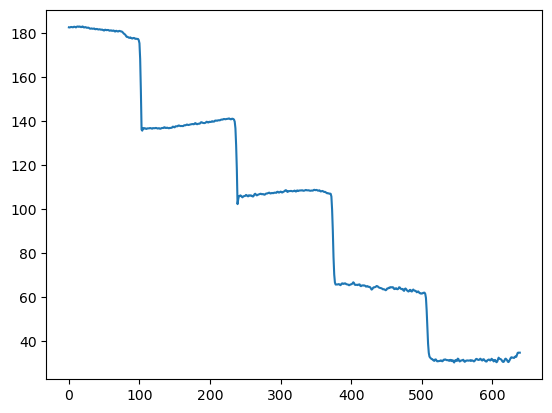

In [34]:
gwk = cv2.imread("./grauwertkeil.png")
grey = cv2.cvtColor(gwk, cv2.COLOR_BGR2GRAY)
#cv2.imshow("grauwertkeil", grey)
l = grey.shape[1]
gv = np.full((grey.shape[1]), 0, dtype=float)

for i in range(0,grey.shape[1]):
    gv[i] = np.mean(grey[:,i])
for j in range(0,grey.shape[1],120):
    print(gv[j])
plt.plot(range(0,gv.size),gv)
cv2.waitKey(0)
cv2.destroyAllWindows()